Project - Phase 2
---

Name: Anchal Daga

UBID: 50609480

---
Question 1. Does the incidence of anemia in pregnant women connect with the prevalence of anemia in newborns, and how is this relationship impacted by maternal nutrition programs or availability to qualified medical personnel? 
-
---
Variety of Hypotheses:



Hypothesis 1: 
A higher prevalence of anemia among pregnant women will correlate with an increased prevalence of anemia in infants. 


Hypothesis 2:
In a region, those with greater percentages of deliveries attended by experienced health workers would display lower rates of anemia in infants.



---
Part 1. Algorithm and Visualization:-

Algorithm used: Gaussian Mixture Model

In [11]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

In [24]:
file_path = './cleaned_dataset_rounded_off.csv' 
data = pd.read_csv(file_path)
# print(data.head())

In [25]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3578 entries, 0 to 3577
Data columns (total 52 columns):
 #   Column                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                               --------------  -----  
 0   Region Name                                                                                                          3578 non-null   object 
 1   Region Code                                                                                                          3578 non-null   object 
 2   Year                                                                                                                 3578 non-null   int64  
 3   Birth rate, crude (per 1,000 people)                                                                                 3578 non-null   float64
 4   Births atten

In [28]:
#Getting features relevant to the hypotheses
df = data[['Prevalence of anemia among pregnant women (%)', 
           'Prevalence of anemia among children (% of children ages 6-59 months)', 
           'Births attended by skilled health staff (% of total)',
           'Mortality rate, infant (per 1,000 live births)', 
           'Maternal mortality ratio (modeled estimate, per 100,000 live births)']]

# print(df.info())

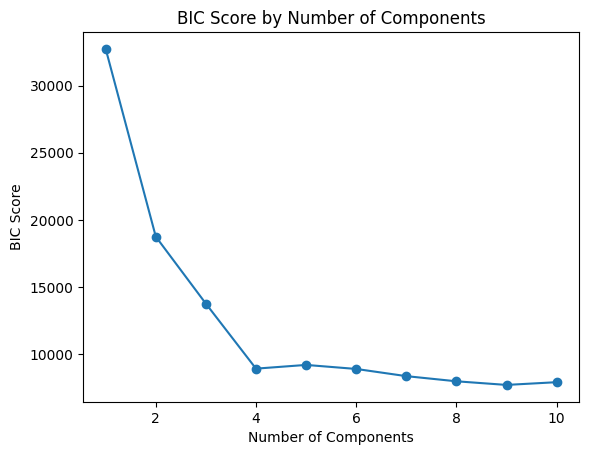

Optimal number of components: 9


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt


# Standardizing values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Calculating BIC score
bic_scores = []
for n_components in range(1, 11):  # Trying 1 to 10 clusters
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(data_scaled)
    bic_scores.append(gmm.bic(data_scaled))

plt.plot(range(1, 11), bic_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.title('BIC Score by Number of Components')
plt.show()

# optimal BIC score
optimal_components = bic_scores.index(min(bic_scores)) + 1
print(f"Optimal number of components: {optimal_components}")



In [30]:
gmm = GaussianMixture(n_components=optimal_components, random_state=42)
gmm.fit(data_scaled)

#cluster labels
cluster_labels = gmm.predict(data_scaled)
df['Cluster'] = cluster_labels

cluster_means = df.groupby('Cluster').mean()
print("Cluster Means:")
print(cluster_means)

Cluster Means:
         Prevalence of anemia among pregnant women (%)  \
Cluster                                                  
0                                            25.143453   
1                                            40.927632   
2                                            34.561793   
3                                            49.163354   
4                                            55.203654   
5                                            19.027208   
6                                            53.453761   
7                                            38.329182   
8                                            41.170000   

         Prevalence of anemia among children (% of children ages 6-59 months)  \
Cluster                                                                         
0                                                23.936876                      
1                                                54.139430                      
2                     

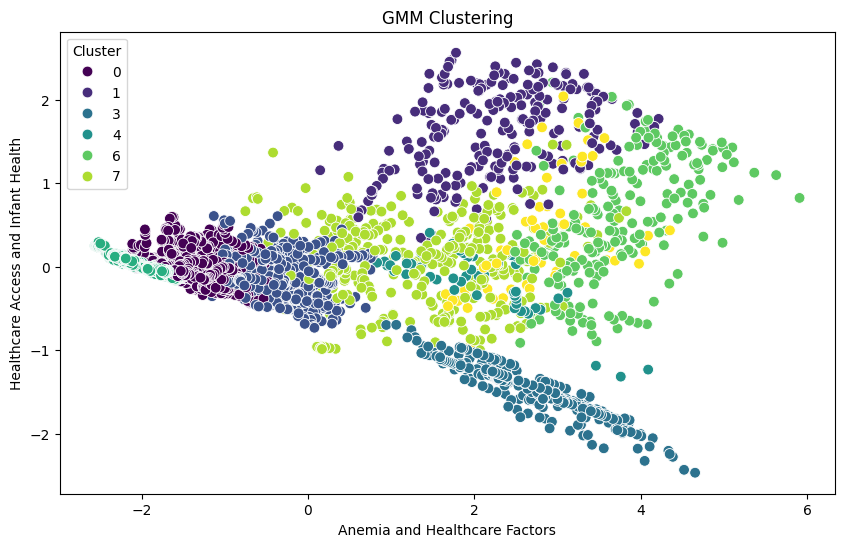

In [31]:
from sklearn.decomposition import PCA
import seaborn as sns


pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)

# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], hue=cluster_labels, palette='viridis', s=60)
plt.xlabel('Anemia and Healthcare Factors')
plt.ylabel('Healthcare Access and Infant Health')
plt.title('GMM Clustering')
plt.legend(title='Cluster')
plt.show()


In [32]:
import scipy.stats as stats

cluster_3 = df[df['Cluster'] == 3]['Prevalence of anemia among children (% of children ages 6-59 months)']
cluster_4 = df[df['Cluster'] == 4]['Prevalence of anemia among children (% of children ages 6-59 months)']

t_stat, p_value = stats.ttest_ind(cluster_3, cluster_4)
print(f"T-test between Cluster 3 and Cluster 4 for Infant Anemia: t-statistic={t_stat}, p-value={p_value}")


T-test between Cluster 3 and Cluster 4 for Infant Anemia: t-statistic=-1.0158231969836977, p-value=0.3103633342593982


In [33]:
print("Means of the components:")
print(gmm.means_)

print("Covariances of the components:")
print(gmm.covariances_)

Means of the components:
[[-0.55620335 -0.57480036  0.6171185  -0.57290489 -0.49515754]
 [ 0.70883995  0.9751734  -0.4145241   0.90439302  2.3007859 ]
 [ 0.16299592 -0.08883814  0.36271522 -0.14136417 -0.24239416]
 [ 1.34006446  1.58116197 -1.57331234  1.66990436 -0.32917133]
 [ 1.81730689  1.65737348 -0.02738578  0.46803343  0.51441578]
 [-1.05026846 -1.03859428  0.74159514 -0.97250494 -0.73697579]
 [ 1.6584507   1.71896557 -1.47032902  1.51620019  1.91773475]
 [ 0.46386357  0.45542071 -0.73435805  0.56768952  0.54605695]
 [ 0.65871308  0.58721851 -2.4718915   0.95344949  1.6438753 ]]
Covariances of the components:
[[[ 1.35645775e-01  5.08447026e-02 -8.34631894e-03  1.02874117e-02
   -7.50827295e-03]
  [ 5.08447026e-02  5.20568839e-02 -9.37263317e-03  2.52653574e-02
    3.84221289e-03]
  [-8.34631894e-03 -9.37263317e-03  4.45370578e-02 -1.67629669e-02
   -1.42557136e-02]
  [ 1.02874117e-02  2.52653574e-02 -1.67629669e-02  4.45910209e-02
    2.24774571e-02]
  [-7.50827295e-03  3.842212

Part 2. Explanation and Analysis:- 

1. Choosing Gaussian Mixture Model for the hypotheses: GMM is a probabilistic model that uses combination of many gaussian distributions to produce data. This model was used to analyze the above hypotheses as the relationship between the features choosen are not linear. There are various factors that might influence anemia in pregnant women and in infants, besides the factors that are chosen for analysis here. Factors such as access to quality healthcare, nutrition, etc are factors that might influence Anemia. This leads to the assumption that the relationship between choosen variables is complex and non-linear. By trying to fit several Gaussian distributions to various data subsets, GMM allows the model to recognize such non-linear patterns.

2. Training the model: The following steps were followed to train the GMM model:-

    a. Selecting relevant features from the dataset that can be used to analyze the hypotheses.

    b. Standardize the various features collected, so that they can have the same scale when analyzed. The GMM model is sensitive to scale of the features. Standardizing helps in avoiding drastic variations in results due to larger or smaller values.

    c. Calculating Bayesian Information Criterion(BIC) for different clusters: We try and identify the cluster count by using BIC for different number of clusters. For every value of cluster, the model is fitting to the data. The BIC score is then computed for every cluster. A lower BIC score indicates a better model. 

    d. Computing optimal BIC score: BIC values are plotted to help identify the number of clusters that results in the lowest BIC, which suggests the best-fitting model.A proper count on the number of clusters also provides valuable insights into how maternal anemia, infant anemia, and healthcare infrastructure group together.

    e. Fit GMM with optimal number of clusters: The GMM model gives each data point a probability, such that the point belongs to a cluster. Fitting the GMM involves identifying the optimal pattern for each cluster, including the mean, covariance, and mixture weight.

    f. Predicting cluster labels: After fitting the model we assign each data point to a cluster based on GMM's prediction. The build in function, 'gmm.predict' identifies the cluster with the highest probability for each data point. 

    g. Trying to analyze the model predictions using mean values: We try and get the mean values within each cluster to conclude some analysis.


4.   Analysis on applying model:-
The Gaussian Mixture Model (GMM) generated 8 distinct clusters. We analyze 2 clusters (Cluster 3 and Cluster 4) and the prevalence of anemia in babies in these clusters using the T-test. The T-test is a statistical test used to compare the means of two groups (Cluster 3 and Cluster 4) to see if there is a statistically significant difference between them. The T-test here helps us assess if the differences in infant anemia prevalence are meaningful and not just due to random variation. The T-statistic of -1.016 indicates that the means regarding infant anemia prevalence in the two clusters are relatively close, while the p-value of 0.310 shows that the difference is not statistically significant. This means that, based on this test, there is no strong evidence that the two clusters differ in terms of infant anemia prevalence. Thus, the T-test results suggest that the clusters (Cluster 3 and Cluster 4) might not have significantly different levels of infant anemia, which implies that other factors (such as healthcare access, maternal anemia, or nutrition) might not be strongly differentiating these clusters based on infant anemia prevalence alone.


---
Question 2. What is the relationship between hospital infrastructure and the rates of stillbirths and neonatal deaths in different nations?
---
---
Variety of Hypotheses:



Hypothesis 1 : 
In China, higher hospital resources will be associated with lower rates of neonatal deaths and stillbirths.

Hypothesis 2:
In Ghana, higher hospital resources will be associated with lower rates of neonatal deaths and stillbirths.



---
Part 1. Algorithm and Visualization:-

Algorithm used: K- Means

In [34]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:

china_data = data[data['Region Name'] == 'China']
ghana_data = data[data['Region Name'] == 'Ghana']


china_features = china_data[['Hospital beds (per 1,000 people)', 'Mortality rate, neonatal (per 1,000 live births)', 'Stillbirth rate (per 1,000 total births)']]
ghana_features = ghana_data[['Hospital beds (per 1,000 people)', 'Mortality rate, neonatal (per 1,000 live births)', 'Stillbirth rate (per 1,000 total births)']]

# Standardizing features
scaler = StandardScaler()

china_scaled = scaler.fit_transform(china_features)
ghana_scaled = scaler.transform(ghana_features)


# Appling k means
kmeans_china = KMeans(n_clusters=2, random_state=42)
china_clusters = kmeans_china.fit_predict(china_scaled)

kmeans_ghana = KMeans(n_clusters=2, random_state=42)
ghana_clusters = kmeans_ghana.fit_predict(ghana_scaled)



china_data['Cluster'] = china_clusters
ghana_data['Cluster'] = ghana_clusters

# Cluster centers for China
print("China Cluster Centers:")
print(kmeans_china.cluster_centers_)

# Cluster centers for Ghana
print("Ghana Cluster Centers:")
print(kmeans_ghana.cluster_centers_)




China Cluster Centers:
[[-0.85952921  0.89259336  0.9191409 ]
 [ 0.76402596 -0.79341632 -0.81701413]]
Ghana Cluster Centers:
[[-1.11689304  6.6055381   5.89976564]
 [-0.29035919  4.84722848  4.95261327]]


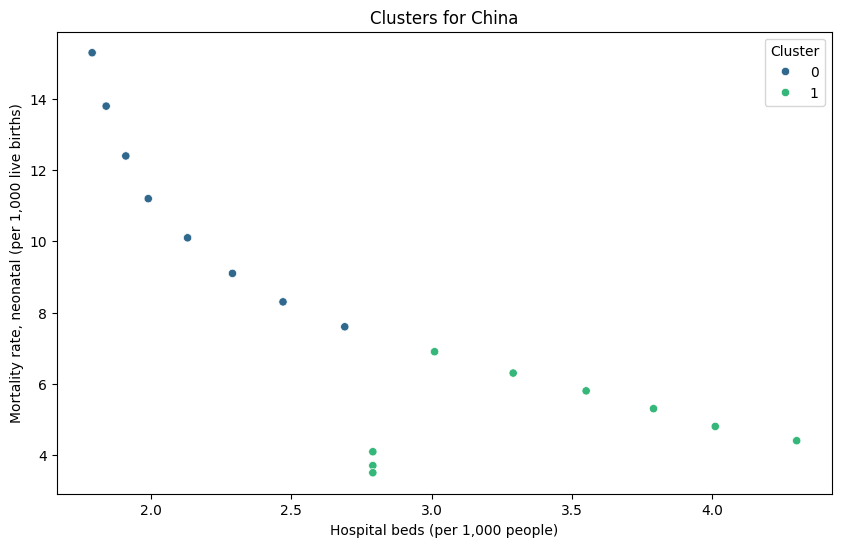

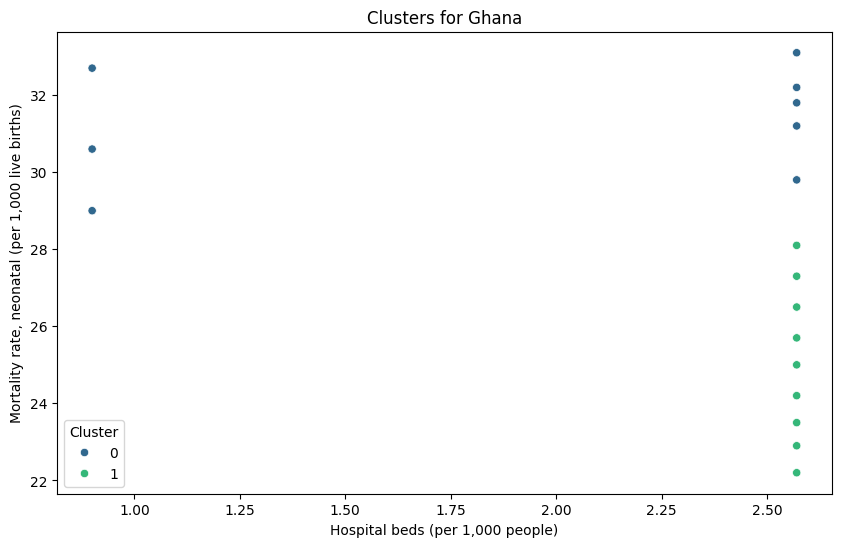

In [36]:
# Plot for China
plt.figure(figsize=(10, 6))
sns.scatterplot(x=china_data['Hospital beds (per 1,000 people)'], y=china_data['Mortality rate, neonatal (per 1,000 live births)'], hue=china_data['Cluster'], palette="viridis")
plt.title("Clusters for China")
plt.xlabel("Hospital beds (per 1,000 people)")
plt.ylabel("Mortality rate, neonatal (per 1,000 live births)")
plt.show()

# Plot for Ghana
plt.figure(figsize=(10, 6))
sns.scatterplot(x=ghana_data['Hospital beds (per 1,000 people)'], y=ghana_data['Mortality rate, neonatal (per 1,000 live births)'], hue=ghana_data['Cluster'], palette="viridis")
plt.title("Clusters for Ghana")
plt.xlabel("Hospital beds (per 1,000 people)")
plt.ylabel("Mortality rate, neonatal (per 1,000 live births)")
plt.show()


In [37]:
from sklearn.metrics import silhouette_score

# Silhouette score 
china_silhouette = silhouette_score(china_scaled, china_clusters)
ghana_silhouette = silhouette_score(ghana_scaled, ghana_clusters)

print("China Silhouette Score:", china_silhouette)
print("Ghana Silhouette Score:", ghana_silhouette)


China Silhouette Score: 0.5501836208357938
Ghana Silhouette Score: 0.5068470669876899


Part 2. Explanation and Analysis:- 

1. Choosing K- Means for the hypotheses: K-means is an unsupervised machine learning method, which means that it can identify patterns without the use of labeled data. The association between death rates and healthcare infrastructure is not specifically defined by any labeled outcomes for this issue. K-means enables us to identify patterns and groups within the data by clustering comparable data points. This clustering could reveal groups of countries with high infrastructure and low mortality, which can then be compared with those having low infrastructure and high mortality to infer trends.

2. Training the model: The following steps were followed to train the GMM model:-

    a. Selecting relevant features from the dtaaset that can be used to analyze the hypotheses, along with filtering data specifically to analyze data of China and Ghana.

    b. Standardize the various features collected, so that they can have the same scale when analyzed. K means uses euclidean distance and it is therefore important to scale and standardize the data before applying the model.

    c.  Applying two clusters each for the two countries and adding labels to the data to group them together.

    d. Getting cluster centers for the two countries: After running K-means, to analyze the results, we examine each cluster center (the centroid) that represents a point within that group. Each centroid reveals an average profile of hospital resources and health outcomes for the nations grouped in that cluster. By examining these profiles, one can identify common patterns that might explain why certain countries have similar health outcomes based on their hospital infrastructure.

    e. Trying to analyze the model predictions using silhouette score: we try and get the silhouette score of the two clusters to conclude some analysis. If the silhouette score is close to 1, it indicates well-defined clusters.


3.   Analysis on applying model:-
The scatter plot shows relationship between hospital beds per 1,000 people and neonatal mortality rate (per 1,000 live births) for China and Ghana.

China:-
Cluster 0 (blue points): These points represent data where the hospital beds per 1,000 people are relatively low (around 2 beds), and the neonatal mortality rate is higher (close to 14 per 1,000 live births).

Cluster 1 (green points): In this cluster, higher hospital bed availability per 1,000 people (around 3.5 to 4.5 beds) corresponds with a lower neonatal mortality rate (ranging from 4 to 6 per 1,000 live births).

Analysis: It suggests a negative correlation as the availability of hospital beds increases in China, the neonatal mortality rate tends to decrease. This supports the hypothesis that higher hospital resources are associated with better health outcomes (lower neonatal mortality).


Ghana:-
Cluster 0 (blue points): Here, the data points are concentrated around very low hospital bed availability (close to 1 bed per 1,000 people), with neonatal mortality rates between 25 and 32 per 1,000 live births.

Cluster 1 (green points): In this cluster, hospital bed availability is slightly higher (around 2 beds per 1,000 people), and neonatal mortality rates are still high (28-32 per 1,000 live births).

Analysis: The visualization of the data suggests that while there is some relationship, the range of neonatal mortality rates does not show a clear trend with the number of hospital beds in Ghana. This could indicate that hospital beds are not the only factor affecting neonatal mortality, and other factors might be influencing health outcomes in Ghana.

We are also using Silhouette score to analyze the quality of cluster formed. 

With a silhouette score of 0.550, the clustering results are significant since the Chinese clusters are comparatively strong and well-separated.
Given that Chinese clusters are of higher quality, there may be a noticeable correlation between infant mortality rates and hospital resources, as indicated by the number of hospital beds per 1,000 inhabitants. This lends support to Hypothesis 1, which holds that lower rates of stillbirth and neonatal mortality in China are linked to greater hospital resources.
The visualization's clusters also clearly demonstrate a pattern that lower death rates are correlated with more hospital resources. This trend and clustering quality support the notion that better maternal and infant health outcomes in China are a result of better healthcare infrastructure.

Ghana's clustering quality is moderate, as indicated by its silhouette score of 0.507. The clusters are not as well defined as in China, despite the fact that they can be fairly distinguished.
Even at varying hospital resource levels, both clusters in Ghana exhibit comparatively high infant mortality rates, indicating a weaker correlation between hospital resources and neonatal mortality rates. Because the clustering results for Ghana are less clear, this mild silhouette score indicates the absence of a strong pattern.
This implies that the data do not provide significant support for Hypothesis 2, which holds that greater hospital resources in Ghana will result in decreased rates of stillbirths and infant mortality. Neonatal death rates in Ghana may also be impacted by variables other than the supply of hospital beds, such as socioeconomic circumstances, access to qualified healthcare professionals, etc.


Citations for GMM Model:-

1. https://medium.com/@tejaspawar21/gaussian-mixture-models-explained-applying-gmm-and-em-for-effective-data-clustering-ca24f8911609

2. https://www.geeksforgeeks.org/gaussian-mixture-model/

3. https://scikit-learn.org/1.5/modules/mixture.html

